#### This notebook will find the average one year value of variables of counties in CONUS

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import xarray as xr
# Spatial subsetting of netcdf files
import regionmask

In [2]:
data = xr.open_dataset("data.nc")
data

<xarray.Dataset> Size: 7MB
Dimensions:        (valid_time: 12, latitude: 35, longitude: 81)
Coordinates:
  * valid_time     (valid_time) datetime64[ns] 96B 2010-01-01 ... 2010-12-01
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
Data variables: (12/48)
    d2m            (valid_time, latitude, longitude) float32 136kB ...
    t2m            (valid_time, latitude, longitude) float32 136kB ...
    bcaod550       (valid_time, latitude, longitude) float32 136kB ...
    chnk           (valid_time, latitude, longitude) float32 136kB ...
    duaod550       (valid_time, latitude, longitude) float32 136kB ...
    lai_hv         (valid_time, latitude, longitude) float32 136kB ...
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 136kB ...
    aermsssss      (valid_time, latitude, longitude) float32 136kB ...
    aermssssm      (valid_time, latitude, longitude) float32 136kB ...
    aermssssl      (valid_time, latitude, longitude) float32 136kB ...
    aermsssu       (valid_time, latitude, longitude) float32 136kB ...
    aermssso2      (valid_time, latitude, longitude) float32 136kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
## resample the data to 1 year average

year_avg = data.resample(valid_time='1YE').mean(dim='valid_time')
year_avg

<xarray.Dataset> Size: 545kB
Dimensions:        (valid_time: 1, latitude: 35, longitude: 81)
Coordinates:
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
  * valid_time     (valid_time) datetime64[ns] 8B 2010-12-31
Data variables: (12/48)
    d2m            (valid_time, latitude, longitude) float32 11kB 278.3 ... 2...
    t2m            (valid_time, latitude, longitude) float32 11kB 281.6 ... 2...
    bcaod550       (valid_time, latitude, longitude) float32 11kB 0.006512 .....
    chnk           (valid_time, latitude, longitude) float32 11kB 0.01415 ......
    duaod550       (valid_time, latitude, longitude) float32 11kB 0.001253 .....
    lai_hv         (valid_time, latitude, longitude) float32 11kB 3.752 ... 0.0
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 11kB 9.168e-06 ....
    aermsssss      (valid_time, latitude, longitude) float32 11kB 6.539e-07 ....
    aermssssm      (valid_time, latitude, longitude) float32 11kB 4.983e-05 ....
    aermssssl      (valid_time, latitude, longitude) float32 11kB 1.505e-05 ....
    aermsssu       (valid_time, latitude, longitude) float32 11kB 2.849e-06 ....
    aermssso2      (valid_time, latitude, longitude) float32 11kB 6.057e-07 ....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
## delete variables that have NaN in them

vars_with_nan = [var for var in year_avg if year_avg[var].isnull().any()]
year_avg= year_avg.drop_vars(vars_with_nan)
year_avg

<xarray.Dataset> Size: 523kB
Dimensions:        (valid_time: 1, latitude: 35, longitude: 81)
Coordinates:
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
  * valid_time     (valid_time) datetime64[ns] 8B 2010-12-31
Data variables: (12/46)
    d2m            (valid_time, latitude, longitude) float32 11kB 278.3 ... 2...
    t2m            (valid_time, latitude, longitude) float32 11kB 281.6 ... 2...
    bcaod550       (valid_time, latitude, longitude) float32 11kB 0.006512 .....
    chnk           (valid_time, latitude, longitude) float32 11kB 0.01415 ......
    duaod550       (valid_time, latitude, longitude) float32 11kB 0.001253 .....
    lai_hv         (valid_time, latitude, longitude) float32 11kB 3.752 ... 0.0
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 11kB 9.168e-06 ....
    aermsssss      (valid_time, latitude, longitude) float32 11kB 6.539e-07 ....
    aermssssm      (valid_time, latitude, longitude) float32 11kB 4.983e-05 ....
    aermssssl      (valid_time, latitude, longitude) float32 11kB 1.505e-05 ....
    aermsssu       (valid_time, latitude, longitude) float32 11kB 2.849e-06 ....
    aermssso2      (valid_time, latitude, longitude) float32 11kB 6.057e-07 ....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
## note that even though the time dimesion, essentially shows 2010-12-31,
## what it actually means is yearly average
year_avg.to_dataframe()

d2m         t2m  bcaod550      chnk  \
valid_time latitude longitude                                               
2010-12-31 49.5     -126.00    278.348907  281.556824  0.006512  0.014148   
                    -125.25    279.088837  282.437836  0.006916  0.013934   
                    -124.50    279.470001  282.923370  0.007213  0.013523   
                    -123.75    279.041290  282.562347  0.007478  0.013581   
                    -123.00    277.851837  281.525085  0.008017  0.014813   
...                                   ...         ...       ...       ...   
           24.0     -69.00     293.523407  297.542999  0.004872  0.012293   
                    -68.25     293.495728  297.488953  0.004856  0.012303   
                    -67.50     293.465454  297.455261  0.004833  0.012302   
                    -66.75     293.443970  297.427094  0.004824  0.012318   
                    -66.00     293.438751  297.397156  0.004825  0.012332   

                               duaod550    lai_hv    lai_lv            msl  \
valid_time latitude longitude                                                
2010-12-31 49.5     -126.00    0.001253  3.752065  2.928701  101390.726562   
                    -125.25    0.001246  4.228424  1.811178  101402.250000   
                    -124.50    0.001238  2.194234  0.692861  101427.570312   
                    -123.75    0.001204  0.905955  0.624898  101459.429688   
                    -123.00    0.001140  3.628265  2.724324  101485.656250   
...                                 ...       ...       ...            ...   
           24.0     -69.00     0.024328  0.000000  0.000000  101571.789062   
                    -68.25     0.024477  0.000000  0.000000  101578.000000   
                    -67.50     0.024507  0.000000  0.000000  101583.164062   
                    -66.75     0.024585  0.000000  0.000000  101590.195312   
                    -66.00     0.024893  0.000000  0.000000  101595.625000   

                               omaod550         pm2p5  ...     aermssdul  \
valid_time latitude longitude                          ...                 
2010-12-31 49.5     -126.00    0.055563  5.288607e-09  ...  5.697568e-07   
                    -125.25    0.060980  6.618710e-09  ...  5.552510e-07   
                    -124.50    0.063776  7.792362e-09  ...  5.443322e-07   
                    -123.75    0.067136  1.080445e-08  ...  5.231616e-07   
                    -123.00    0.076543  1.931933e-08  ...  4.871432e-07   
...                                 ...           ...  ...           ...   
           24.0     -69.00     0.046011  9.519893e-09  ...  1.086019e-05   
                    -68.25     0.045661  9.399162e-09  ...  1.102058e-05   
                    -67.50     0.045540  9.288230e-09  ...  1.103588e-05   
                    -66.75     0.045691  9.213097e-09  ...  1.106749e-05   
                    -66.00     0.045851  9.209978e-09  ...  1.116341e-05   

                               aermssbchphil  aermssomhphil  aermssbchphob  \
valid_time latitude longitude                                                
2010-12-31 49.5     -126.00     1.359443e-07   2.107467e-06   5.559153e-07   
                    -125.25     1.506114e-07   2.379295e-06   5.843853e-07   
                    -124.50     1.616488e-07   2.564180e-06   6.047914e-07   
                    -123.75     1.798799e-07   2.806439e-06   6.146706e-07   
                    -123.00     2.252995e-07   3.389544e-06   6.264335e-07   
...                                      ...            ...            ...   
           24.0     -69.00      3.103107e-08   5.009322e-07   4.866120e-07   
                    -68.25      3.011268e-08   4.867323e-07   4.857583e-07   
                    -67.50      2.886006e-08   4.733052e-07   4.846137e-07   
                    -66.75      2.775320e-08   4.601205e-07   4.847639e-07   
                    -66.00      2.699588e-08   4.502798e-07   4.856791e-07   

                 

In [6]:
## Lets load the county shapefile

SHAPE_PATH = os.path.join("County_shapefile",'gz_2010_us_050_00_500k.shp')
county_gdf = gpd.read_file(SHAPE_PATH)

county_gdf.head(12)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663..."
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.79043 31.32027, -85.79033 31.323..."
6,0500000US01049,01,049,DeKalb,County,777.093,"POLYGON ((-85.57593 34.82373, -85.56142 34.750..."
7,0500000US01053,01,053,Escambia,County,945.080,"POLYGON ((-87.16308 30.99904, -87.16408 30.999..."
8,0500000US01057,01,057,Fayette,County,627.660,"POLYGON ((-87.63593 33.87874, -87.63604 33.872..."
9,0500000US01061,01,061,Geneva,County,574.408,"POLYGON ((-85.77267 30.99462, -85.77966 30.994..."


In [7]:
## lets create the fips column in the dataframe which is the sum of state and county both as dtype string.
## Note: not a numerical sum
## This step is necessary because there can be several counties with idential names. 

county_gdf['fips']=county_gdf['STATE'] + county_gdf['COUNTY']
county_gdf.dtypes

GEO_ID          object
STATE           object
COUNTY          object
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
fips            object
dtype: object

In [8]:
## convert the data type
county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
county_gdf.dtypes

GEO_ID          object
STATE           object
COUNTY          object
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
fips             int32
dtype: object

In [9]:
county_gdf = county_gdf.drop([ 'GEO_ID','CENSUSAREA','STATE','COUNTY','LSAD'], axis=1)
county_gdf

,NAME,geometry,fips
0,Cleburne,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029
1,Coffee,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",1031
2,Coosa,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037
3,Covington,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",1039
4,Crenshaw,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",1041
...,...,...,...
3216,San Sebastián,"POLYGON ((-66.90748 18.25314, -66.90739 18.253...",72131
3217,Santa Isabel,"POLYGON ((-66.37968 17.94398, -66.38029 17.943...",72133
3218,Toa Baja,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ...",72137
3219,Trujillo Alto,"POLYGON ((-66.02917 18.37590, -66.02828 18.376...",72139


In [10]:
county_gdf.dtypes

NAME          object
geometry    geometry
fips           int32
dtype: object

In [11]:
county_list=county_gdf['fips'].tolist()

In [12]:
var=county_list[4]
print(var)
print(len(county_list))

1041
3221


In [13]:
def single_county(var):
    
    ''' Function to find the average value of weather data variables of a single county
        as listed in county_list.
         Args:
         --------
             var (str): The name of the state.

         Returns:
         --------
            final_df: Dataframe consisting of the columns in the shape file and corresponding value of the variables
                      which in this case is the d2m and t2m.
    '''
    
    county = county_gdf[county_gdf.fips.isin([var])]
    county_mask = regionmask.mask_3D_geopandas(county,year_avg.longitude,year_avg.latitude)
    df_masked = year_avg.where(county_mask)
    summary = df_masked.groupby("region").mean(["latitude", "longitude","valid_time"])
    df2=summary.to_dataframe()   
    
    df = pd.merge(county_gdf, df2, left_index=True, right_index=True, how='left') 
    
    ## It is VERY IMPORTANT that the left dataframe that is merged is a Geopandas Dataframe
    ## Not pandas dataframe. While a Geopandas dataframe can be easily plotted, a pandas  
    ## even if it consists Geometry column, pandas will not recognize it and it will not be plotted

    final_df=df.dropna()
    return final_df

In [14]:
single_county(county_list[4])

,NAME,geometry,fips,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
4,Crenshaw,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",1041,284.089142,291.484558,0.00647,0.018,0.011914,4.014191,2.456685,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,0.000001,0.000008,9.565177e-07


#### Note that running the code below will result in several UserWarning. These Warnings are not errors, rather these counties do not overlay at least one center of the raster. This is also mentioned in Single_county notebook Cell [20].

In [15]:
%%time

## get the average for all of the counties

df_list=[]

for i in range(0,len(county_list)):
    try:
        df_list.append(single_county(county_list[i]))
    except:
        pass
df_list[:4] ## see first 4 df

C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint be

CPU times: total: 32.3 s
Wall time: 1min 10s


C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (0, 35, 81)
  mask_3D = _mask_3D(
C:\Users\Shisir\.conda\envs\Weather_Prediction\lib\site-packages\regionmask\core\_geopandas.py:275: UserWarning: No gridpoint be

[       NAME                                           geometry  fips  \
 0  Cleburne  POLYGON ((-85.38872 33.91304, -85.38088 33.873...  1029   
 
           d2m         t2m  bcaod550   chnk  duaod550    lai_hv   lai_lv  ...  \
 0  282.409454  289.701843   0.00623  0.018  0.007729  3.512115  2.76063  ...   
 
    aermssdul  aermssbchphil  aermssomhphil  aermssbchphob  aermssomhphob  \
 0   0.000002   1.377307e-07       0.000003   5.241809e-07       0.000013   
 
       aermsssss  aermssssm     aermssssl  aermsssu  aermssso2  
 0  1.976094e-07   0.000013  7.136917e-07  0.000009   0.000004  
 
 [1 rows x 49 columns],
     NAME                                           geometry  fips        d2m  \
 2  Coosa  POLYGON ((-86.00928 33.10164, -86.00917 33.090...  1037  283.18924   
 
           t2m  bcaod550   chnk  duaod550    lai_hv    lai_lv  ...  aermssdul  \
 2  290.505219  0.006213  0.018  0.009482  3.834117  2.526723  ...   0.000003   
 
    aermssbchphil  aermssomhphil  aermssbchphob 

In [16]:
final_df=pd.concat(df_list)
final_df

,NAME,geometry,fips,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
0,Cleburne,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",1029,282.409454,289.701843,0.006230,0.018,0.007729,3.512115,2.760630,...,0.000002,1.377307e-07,0.000003,5.241809e-07,0.000013,1.976094e-07,0.000013,7.136917e-07,0.000009,4.015941e-06
2,Coosa,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",1037,283.189240,290.505219,0.006213,0.018,0.009482,3.834117,2.526723,...,0.000003,1.304787e-07,0.000003,5.296379e-07,0.000013,2.162700e-07,0.000015,8.746867e-07,0.000008,2.576766e-06
4,Crenshaw,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",1041,284.089142,291.484558,0.006470,0.018,0.011914,4.014191,2.456685,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,1.308160e-06,0.000008,9.565177e-07
5,Dale,"POLYGON ((-85.79043 31.32027, -85.79033 31.323...",1045,284.509399,291.161957,0.006482,0.018,0.011258,4.287028,2.061290,...,0.000004,1.461356e-07,0.000002,5.425537e-07,0.000013,2.485089e-07,0.000017,1.232566e-06,0.000007,1.027969e-06
8,Fayette,"POLYGON ((-87.63593 33.87874, -87.63604 33.872...",1057,283.532196,289.937836,0.006079,0.018,0.009675,3.378296,2.902476,...,0.000003,1.183458e-07,0.000003,5.274545e-07,0.000013,2.085023e-07,0.000014,7.774576e-07,0.000008,1.756432e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Natrona,"POLYGON ((-107.54353 42.78136, -107.54353 42.7...",56025,269.258545,278.661865,0.004946,0.018,0.004822,4.773596,0.524160,...,0.000004,9.262781e-08,0.000002,4.327117e-07,0.000008,2.042346e-07,0.000012,8.403808e-07,0.000003,7.699179e-07
3138,Niobrara,"POLYGON ((-104.05298 42.85955, -104.05286 42.7...",56027,271.809998,282.436890,0.005428,0.018,0.007821,3.480769,0.665827,...,0.000008,1.093200e-07,0.000002,4.673841e-07,0.000010,2.133739e-07,0.000013,8.428657e-07,0.000004,8.534925e-07
3139,Platte,"POLYGON ((-104.77417 42.60996, -104.76422 42.6...",56031,270.224579,280.893250,0.004932,0.018,0.005912,4.987579,0.839091,...,0.000006,9.810949e-08,0.000002,4.258856e-07,0.000009,1.971148e-07,0.000012,7.368602e-07,0.000004,1.037540e-06
3140,Sweetwater,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",56037,268.781525,278.435303,0.004733,0.018,0.004328,1.909917,0.496814,...,0.000004,9.214236e-08,0.000002,4.107081e-07,0.000008,2.036675e-07,0.000012,9.120961e-07,0.000003,1.408471e-06


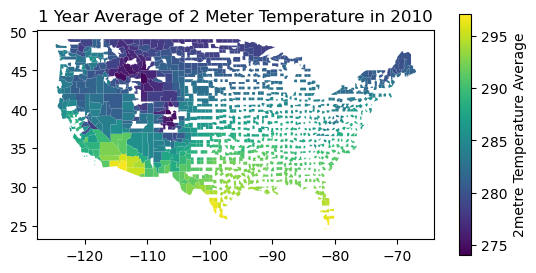

In [17]:
final_df.plot(column='t2m', legend=True, legend_kwds={"label": "2metre Temperature Average",
                                                                             "shrink":0.65})
plt.title('1 Year Average of 2 Meter Temperature in 2010')
plt.show()

## Note that the process of masking has provided 1128 counties instead of the 3200+ counties, this is because the other counties are either so small that do not overlay the center of a single raster, OR they are big enough but do not overlay the raster. This can happen of the resoluion of raster is too big, which in this case is 0.75 X 0.75. The process of regridding and obtianing the values of all counties, will be done in the next notebook.